In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy

# Design Choices

We assessed several features of the Environment response in order to ensure (1) non stationarity and (2) realism. 

In [2]:
prices = np.linspace(0,1,100)
n_users = 20
T = 300

## Purchase Probability

$\textbf{Time and Price Dependence}.$

We want Purchase Probability to be (1) output of a lambda function ($\textit{self.prob_func}$) (2) highly non-stationary (3) user-dependent. Several example are reported below.

In [3]:
prob_funcs = {}
prob_funcs['logit_prob_func'] = lambda p,t: scipy.special.expit(5*p*t/T) 
prob_funcs['exp_prob_func'] = lambda p,t: np.exp(3*p*t/T)/np.exp(3)
prob_funcs['sinusoidal_prob_func'] = lambda p,t: np.maximum(0,(p+np.sin(100*p)/10)*(t+1)/T)
prob_funcs['gaussian_prob_func'] = lambda p,t: scipy.stats.norm.cdf(5*p-1,0.5,0.75*(t+10)/T)

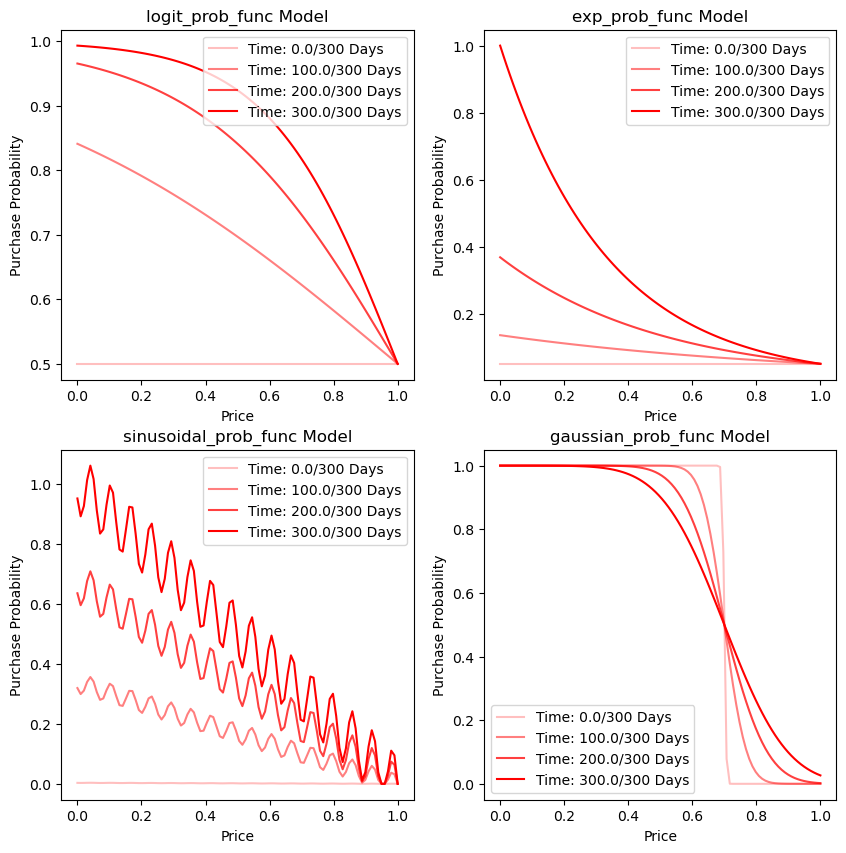

In [4]:
fig, ax = plt.subplots(2,2,figsize=(10,10))

sample_times = np.linspace(0,T,4)
idx = 0

for f_idx in prob_funcs.keys():
    func = prob_funcs[f_idx]
    if idx<2:
        ax[0,idx].plot(prices, func(prices[::-1],sample_times[0]), label=f'Time: {sample_times[0]}/300 Days', alpha = 0.25, c='red')
        ax[0,idx].plot(prices, func(prices[::-1],sample_times[1]), label=f'Time: {sample_times[1]}/300 Days', alpha = 0.5, c='red')
        ax[0,idx].plot(prices, func(prices[::-1],sample_times[2]), label=f'Time: {sample_times[2]}/300 Days', alpha = 0.75, c='red')
        ax[0,idx].plot(prices, func(prices[::-1],sample_times[3]), label=f'Time: {sample_times[3]}/300 Days', c='red')
        ax[0,idx].set_xlabel('Price')
        ax[0,idx].set_ylabel('Purchase Probability')
        ax[0,idx].set_title(f'{f_idx} Model')
        ax[0,idx].legend()
    else:
        ax[1,idx-2].plot(prices, func(prices[::-1],sample_times[0]), label=f'Time: {sample_times[0]}/300 Days', alpha = 0.25, c='red')
        ax[1,idx-2].plot(prices, func(prices[::-1],sample_times[1]), label=f'Time: {sample_times[1]}/300 Days', alpha = 0.5, c='red')
        ax[1,idx-2].plot(prices, func(prices[::-1],sample_times[2]), label=f'Time: {sample_times[2]}/300 Days', alpha = 0.75, c='red')
        ax[1,idx-2].plot(prices, func(prices[::-1],sample_times[3]), label=f'Time: {sample_times[3]}/300 Days', c='red')
        ax[1,idx-2].set_xlabel('Price')
        ax[1,idx-2].set_ylabel('Purchase Probability')
        ax[1,idx-2].set_title(f'{f_idx} Model')  
        ax[1,idx-2].legend()
    idx += 1
    

> $\textit{logit_prob_func}$ and $\textit{exp_prob_func}$ are meant to test smooth monotonic functions with different convexities.

> $\textit{sinusoidal_prob_func}$ is meant to test non-monotonic functions (behavoural effects: 'if the cost is too low, it could be a scam').

> $\textit{gaussian_prob_func}$ is meant to test dramatic changes in the preferences ('I buy only if the price is below 0.5').

$\textbf{User Dependence}.$

We apply user-dependent noise to ensure a typical behavour for every user. In particular, noise is applied to price entering the conversion probability function, to address both (1) complexity, (2) different perceptions of prices.

In [5]:
noise = np.random.normal(0,0.5,size = n_users)

Text(0, 0.5, 'Purchase Probability')

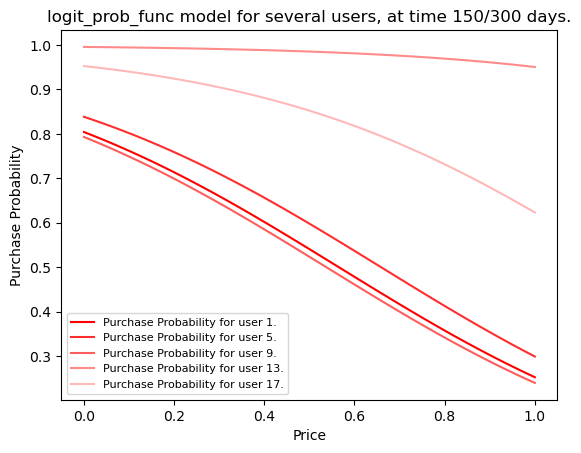

In [6]:
func = prob_funcs['logit_prob_func']
for user in range(0,n_users,4):
    prob = np.maximum(0, func(prices[::-1]+np.ones(prices.shape[0])*noise[user], 150))
    alp = 0.1 + 0.9*(n_users-user)/n_users
    plt.plot(prices, prob, label=f'Purchase Probability for user {user+1}.', alpha = alp, c='red')
plt.legend(fontsize=8)
plt.title('logit_prob_func model for several users, at time 150/300 days.')
plt.xlabel('Price')
plt.ylabel('Purchase Probability')